In [2]:
%cd ..

/Users/mateoibarguen/Desktop/DATA-Capstone


In [3]:
from models.networks.lstm_models import *
from models.spectra_preprocessor import *
from keras.utils import plot_model
import seaborn as sns
import math
import numpy as np

from tensorflow.keras import backend as k
from tensorflow.keras.layers import Layer, Input
import tensorflow as tf
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [78]:
spectra_pp = SpectraPreprocessor(dataset_name='test', num_channels=2, num_instances=500, use_generator=False)
X_train, y_train, X_test, y_test = spectra_pp.transform(encoded=True)

In [79]:
spectra_pp.test_spectra_loader.get_dm()[0]

[[0.03466567069893477,
  0.018072804536101328,
  0.03067742054430585,
  0.04435261155220109,
  0.0,
  0.011834233681958368,
  0.031500218191685345,
  0.029436182115797523,
  0.024466161417021952,
  0.011967682174843043,
  0.02659993117574283,
  0.032749188978095686,
  0.04975238014501179,
  0.027177484279329804,
  0.039194992071738745,
  0.026630418182281065,
  0.047229807060377216,
  0.03909832361608866,
  0.03564621585951439,
  0.04009518050923969,
  0.031261295588533446,
  0.026316608759314113,
  0.05264526668245141,
  0.038623288052478603,
  0.024803343507094622,
  0.03861734279223943,
  0.05298099931525498,
  0.06443124976568057,
  0.07294894511433359,
  0.059580298782867046,
  0.038164286389866055,
  0.03679563168497501,
  0.04947505425571676,
  0.048193941664455855,
  0.07286585310421531,
  0.08625450953180289,
  0.08337999387017173,
  0.08305065011527112,
  0.06064796296343505,
  0.07706623811272913,
  0.09890033542734289,
  0.09274801558479104,
  0.07191006215544446,
  0.09308

In [81]:
X_test[0].shape

(301, 2)

In [68]:
a

array([[0.00666716],
       [0.01027472],
       [0.01929947],
       [0.00423109],
       [0.027376  ],
       [0.04048574],
       [0.04033772],
       [0.01503841],
       [0.00921809],
       [0.02076284],
       [0.03230787],
       [0.0041568 ],
       [0.01492843],
       [0.04046841],
       [0.03693846],
       [0.0037143 ],
       [0.        ],
       [0.01729527],
       [0.05072664],
       [0.01508276],
       [0.03554371],
       [0.03799147],
       [0.02795601],
       [0.02685364],
       [0.00950676],
       [0.03333934],
       [0.03178948],
       [0.02947059],
       [0.03811262],
       [0.02863882],
       [0.03860961],
       [0.01669577],
       [0.04034746],
       [0.06126617],
       [0.06012685],
       [0.01942468],
       [0.02304701],
       [0.05584304],
       [0.06565608],
       [0.03748186],
       [0.03703743],
       [0.03507508],
       [0.07927226],
       [0.05080453],
       [0.05455703],
       [0.06839631],
       [0.06552208],
       [0.070

In [69]:
def pad_channels(input_dm, target_num_channels):
    output_dm = input_dm
    current_num_channels = input_dm.shape[1]
    remaining_num_channels = target_num_channels - current_num_channels
    if remaining_num_channels > 0:
        output_dm = np.pad(output_dm, ((0, 0), (0, remaining_num_channels)), 'symmetric')
    return output_dm

In [70]:
pad_channels(a, 2)

array([[0.00666716, 0.00666716],
       [0.01027472, 0.01027472],
       [0.01929947, 0.01929947],
       [0.00423109, 0.00423109],
       [0.027376  , 0.027376  ],
       [0.04048574, 0.04048574],
       [0.04033772, 0.04033772],
       [0.01503841, 0.01503841],
       [0.00921809, 0.00921809],
       [0.02076284, 0.02076284],
       [0.03230787, 0.03230787],
       [0.0041568 , 0.0041568 ],
       [0.01492843, 0.01492843],
       [0.04046841, 0.04046841],
       [0.03693846, 0.03693846],
       [0.0037143 , 0.0037143 ],
       [0.        , 0.        ],
       [0.01729527, 0.01729527],
       [0.05072664, 0.05072664],
       [0.01508276, 0.01508276],
       [0.03554371, 0.03554371],
       [0.03799147, 0.03799147],
       [0.02795601, 0.02795601],
       [0.02685364, 0.02685364],
       [0.00950676, 0.00950676],
       [0.03333934, 0.03333934],
       [0.03178948, 0.03178948],
       [0.02947059, 0.02947059],
       [0.03811262, 0.03811262],
       [0.02863882, 0.02863882],
       [0.

In [72]:
a = np.array([[0, 1, 2], [3, 4, 5]])
a

array([[0, 1, 2],
       [3, 4, 5]])

In [75]:
a = np.array([[0, 1, 2], [3, 4, 5]])
np.pad(a, ((0, 4), (0, 0)), 'reflect')

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])

In [23]:
class ChannelPadder(Layer):
    # TODO: Option to shuffle channels when padding.
    # Add padding in preprocessor. 
    
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(ChannelPadder, self).__init__(**kwargs)
        
    def transform_dimensions(self, dm, output_dim):
        result = dm
        nc = dm.shape[2]
        remainder = output_dim % nc
        for i in range(0, output_dim - 2*nc - 2, nc):
            paddings = [[0, 0], [0, 0], [0, nc]]
            result = tf.pad(result, paddings, 'SYMMETRIC')
        paddings = [[0, 0], [0, 0], [0, output_dim - result.shape[2]]]
        result = tf.pad(result, paddings, 'SYMMETRIC')
        return result 
    
    def call(self, X):
        return self.transform_dimensions(X, self.output_dim)   

In [24]:
class GoogleModel(BaseModel):

    def set_params_range(self):
        return {'conv_1': {'type': 'integer', 'min': 8, 'max': 64, 'default': 16},
                'conv_2': {'type': 'integer', 'min': 8, 'max': 64, 'default': 32},
                'bi_1': {'type': 'float', 'min': 8, 'max': 128, 'default': 128},
                'bi_2': {'type': 'integer', 'min': 8, 'max': 128, 'default': 128},
                'drop_1': {'type': 'float', 'min': 0, 'max': 1, 'default': 0.01},
                'dense_1': {'type': 'float', 'min': 8, 'max': 128, 'default': 64},
                'drop_2': {'type': 'float', 'min': 0, 'max': 1, 'default': 0.05}
                }

    def build_model(self, num_channels, num_timesteps, output_shape, params):
        """
        From: https://github.com/douglas125/SpeechCmdRecognition/blob/master/SpeechModels.py

        """
        model = Sequential()
        model.add(Conv1D(params['conv_1'], 5, input_shape=(num_timesteps, num_channels)))
        model.add(BatchNormalization())
        model.add(Conv1D(params['conv_2'], 5))
        model.add(BatchNormalization())
        model.add(Bidirectional(LSTM(params['bi_1'], return_sequences=True)))
        model.add(Bidirectional(LSTM(params['bi_2'], return_sequences=True)))
        model.add(Attention(293))
        model.add(Dropout(params['drop_1']))
        model.add(Dense(params['dense_1'], activation='elu'))
        model.add(Dropout(params['drop_2']))
        model.add(Dense(output_shape, activation='softmax'))
        return model

In [28]:
g = GoogleModel(num_channels=10, num_timesteps=301, output_shape=5)

In [29]:
baseline_model_compile_dict = {'optimizer': 'adam', 'loss': 'categorical_crossentropy', 'metrics':['accuracy']}

In [30]:
g.fit(X_train, y_train, X_test, y_test, 64, 1, compile_dict=baseline_model_compile_dict)

Using default parameters: {'conv_1': 16, 'conv_2': 32, 'bi_1': 128, 'bi_2': 128, 'drop_1': 0.01, 'dense_1': 64, 'drop_2': 0.05}
Train on 68 samples, validate on 17 samples
15/15 [==============================] - 0s 9ms/sample - loss: 1.6505 - accuracy: 0.1333


In [31]:
class EvaluationReport():
    def __init__(self, model, spectra_preprocessor, labels=None):
        self.model = model
        _, _, self.X_test, self.y_test = spectra_preprocessor.transform(encoded=True)
        self.test_spectra_loader = spectra_preprocessor.test_spectra_loader
        self.peak_locs = self.test_spectra_loader.get_peak_locations()
        self.labels = labels
        if self.labels is None:
            self.labels = [i + 1 for i in range(self.y_test.shape[1])]
        self.probs = self.model.keras_model.predict_proba(self.X_test)
        self.preds = self.probs.argmax(axis=1) + 1
        self.y_true_num = self.y_test.argmax(axis=1) + 1
        
    def plot_roc_curves(self, figsize=(9, 7)):
        plt.figure(figsize=figsize)
        lw = 2.5
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Number of Peaks')
        for i in range(len(self.labels)):
            probs_i = self.probs[:, i]
            y_true_i = self.y_test[:, i]
            fpr, tpr, _ = roc_curve(y_true_i, probs_i)
            roc_auc = roc_auc_score(y_true_i, probs_i)
            plt.plot(fpr, tpr,
                 lw=lw, label='%d peaks ROC curve (area = %0.2f)' % (self.labels[i], roc_auc))
            plt.legend(loc='lower right')
        return plt
    
    def plot_mean_pred_prob(self, num_peaks, ax=None):
        subset_probs = self.probs[self.y_test.argmax(axis=1) + 1 == num_peaks].mean(axis=0)
        return self.plot_pred_prob(subset_probs, num_peaks=num_peaks, ax=ax, title_extension=f'Mean predicted probabilities when number peaks = {num_peaks}', y_extension='Mean ')
    
        #return sns.barplot(x = self.labels, y = subset_probs, palette=color_palette, ax=ax).set_title(f'Mean predicted probabilities when number peaks = {num_peaks}')
    
    def plot_mean_pred_probs(self):
        fig, axes = plt.subplots(len(self.labels), 1, figsize=(7, len(self.labels)*5))
        for i, np in enumerate(self.labels):
            self.plot_mean_pred_prob(np, axes[i])
        plt.subplots_adjust(hspace = 0.3)
            
        
    def plot_pred_prob(self, peak_probs, num_peaks=None, ax=None, title_extension=None, y_extension=''):
        title = title_extension
        if title_extension == None:
            title = f'Predicted Probability for Num Peaks'

        color_palette = ['grey' if label != num_peaks else 'red' for label in self.labels]
        bar_plot = sns.barplot(x=[str(i) for i in self.labels], y=peak_probs, palette=color_palette, ax=ax)
        bar_plot.set_title(title)
        bar_plot.set_xlabel('Num Peaks')
        bar_plot.set_ylabel(f'{y_extension} Probability')
        return bar_plot

    def plot_predicted_probs(self, indices, num_channels, num_peaks, title_extension):
        num_plots = len(indices)
        if num_plots == 0:
            num_plots = self.probs.shape[0]

        fig, axes = plt.subplots(math.ceil(num_plots), num_channels + 1, figsize=(num_channels*7, num_plots*5))
        if len(indices) == 1: axes = [axes]

        for i in range(len(indices)):
            sample_idx = indices[i]
            sample_probs = self.probs[sample_idx]
            sample_peak_locs = self.peak_locs[sample_idx]
            self.plot_pred_prob(sample_probs, num_peaks, ax=axes[i][0], title_extension=title_extension)
            
            for l in range(num_channels):
                self.test_spectra_loader.spectra[sample_idx].plot_channel(l, ax=axes[i][l + 1])

        plt.subplots_adjust(hspace = 0.4)
        
    def plot_predicted_probs_misclassified(self, num_peaks, num_channels, num_examples):
        subset_num_peaks_idx = np.where((self.y_true_num == num_peaks) & (self.preds != num_peaks))[0]
        sample_idx = np.random.choice(subset_num_peaks_idx, num_examples)
        self.plot_predicted_probs(sample_idx, num_channels, num_peaks, f'Misclassified Predicted Probabilities, True Num Peaks: {num_peaks}')
        plt.show();
        
    def plot_predicted_probs_misclassified_per_peak(self, num_channels, num_examples):
        for np in self.labels:
            try:
                self.plot_predicted_probs_misclassified(np, num_channels, num_examples)
            except:
                print(f'No misclassified {np} peaks.')
        
        
    
def complete_evaluation(evaluation_report, num_channels_to_show, num_examples_per_peak):
    evaluation_report.plot_roc_curves()
    evaluation_report.plot_mean_pred_probs()
    evaluation_report.plot_predicted_probs_misclassified_per_peak(num_channels_to_show, num_examples_per_peak)


In [41]:
evaluation_report = EvaluationReport(g, spectra_preprocessor=spectra_pp)

num_instances:  100
adjusted_dm_shape:  (100, 10, 301)
X_shape:  (100, 301, 10)
num_instances:  100
adjusted_dm_shape:  (100, 10, 301)
X_shape:  (100, 301, 10)


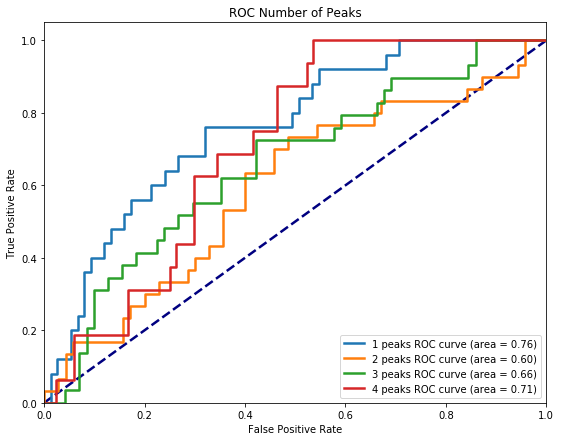

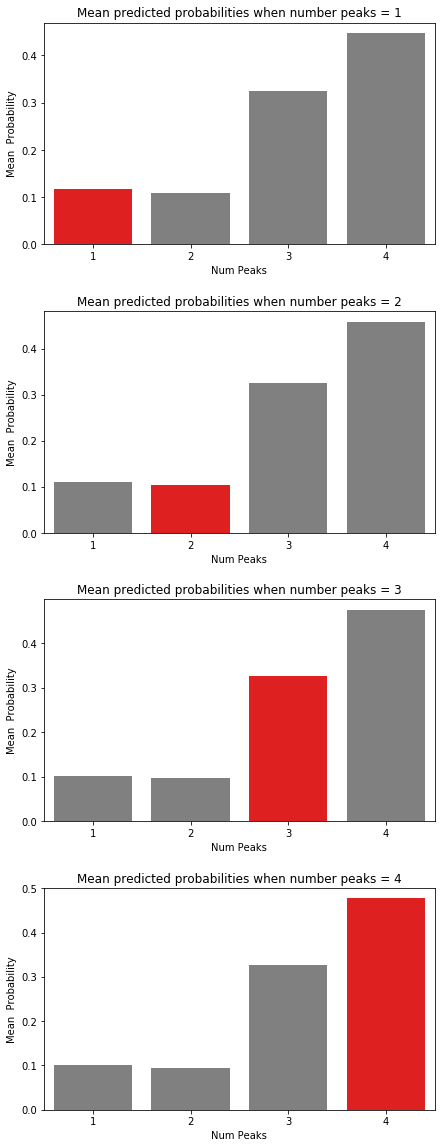

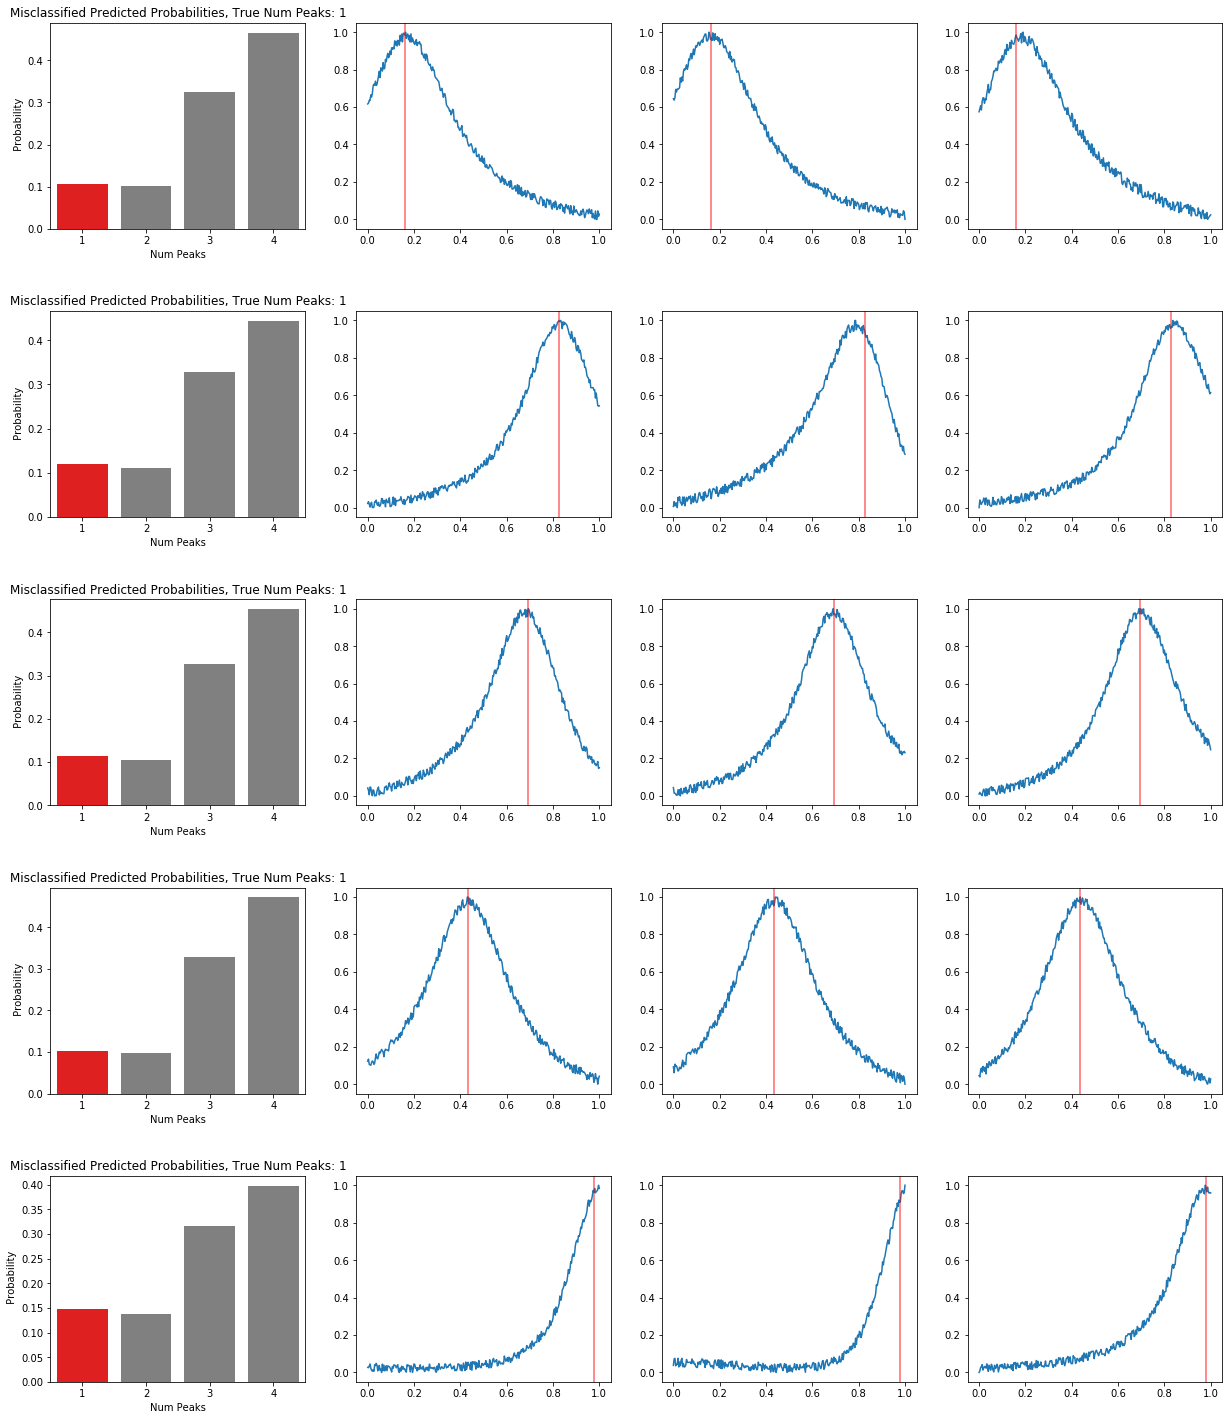

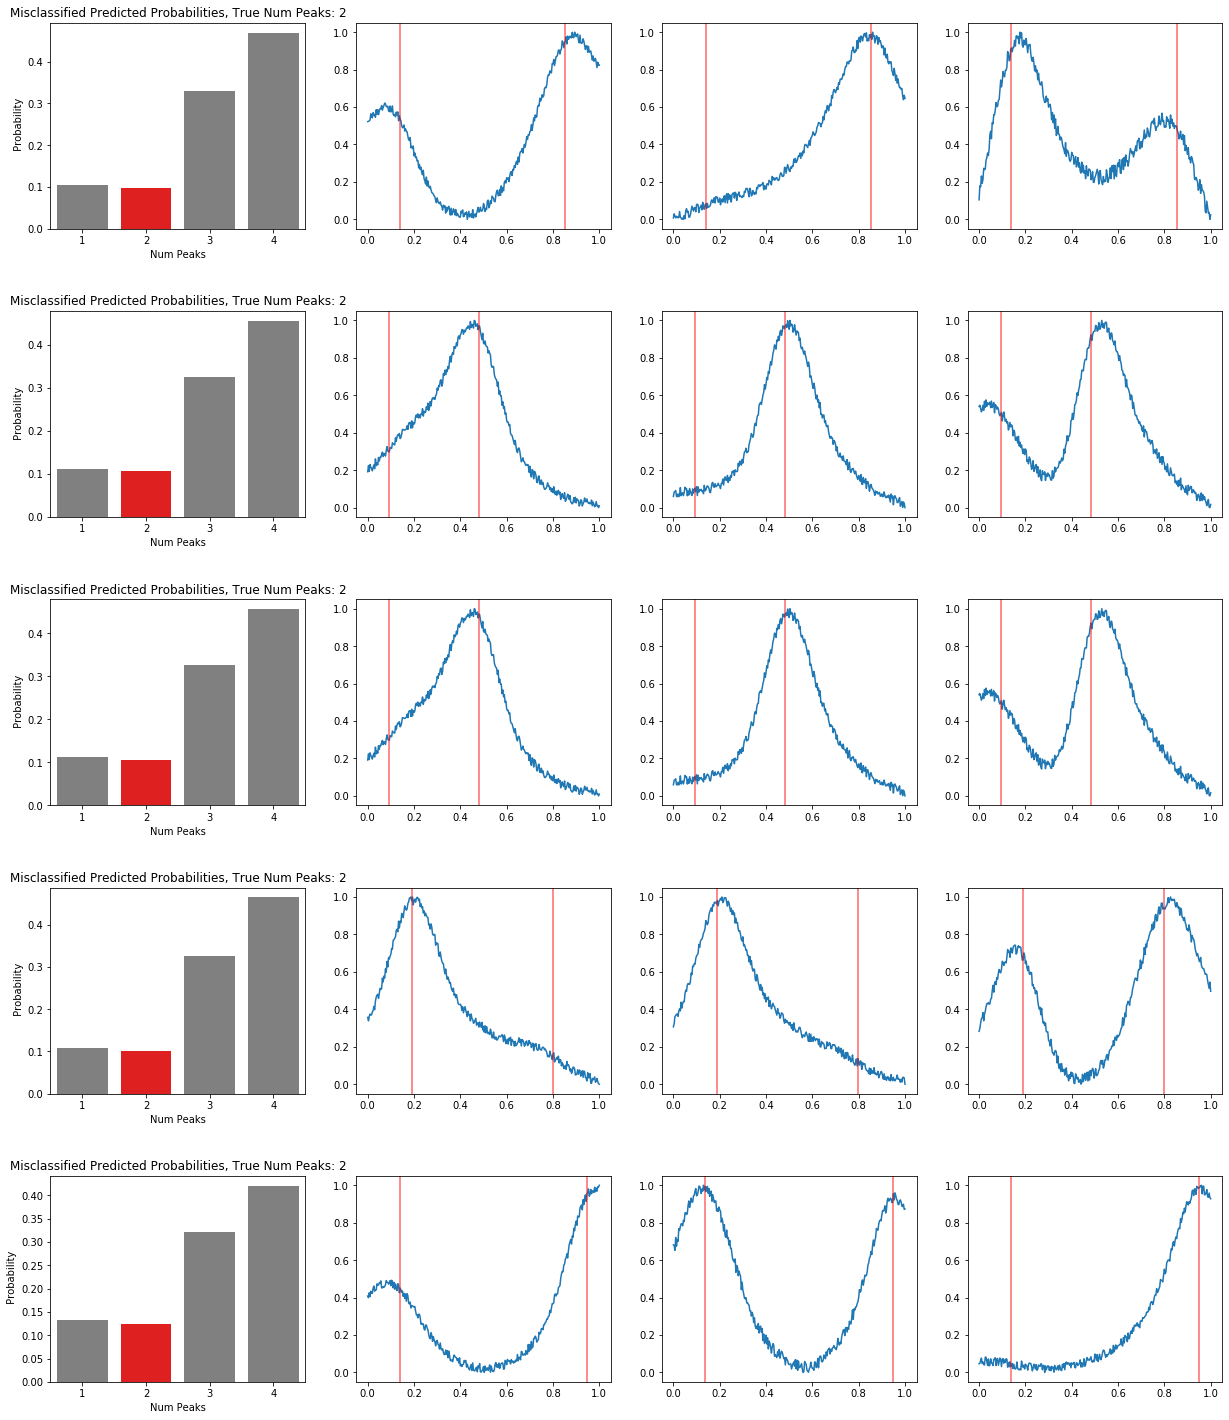

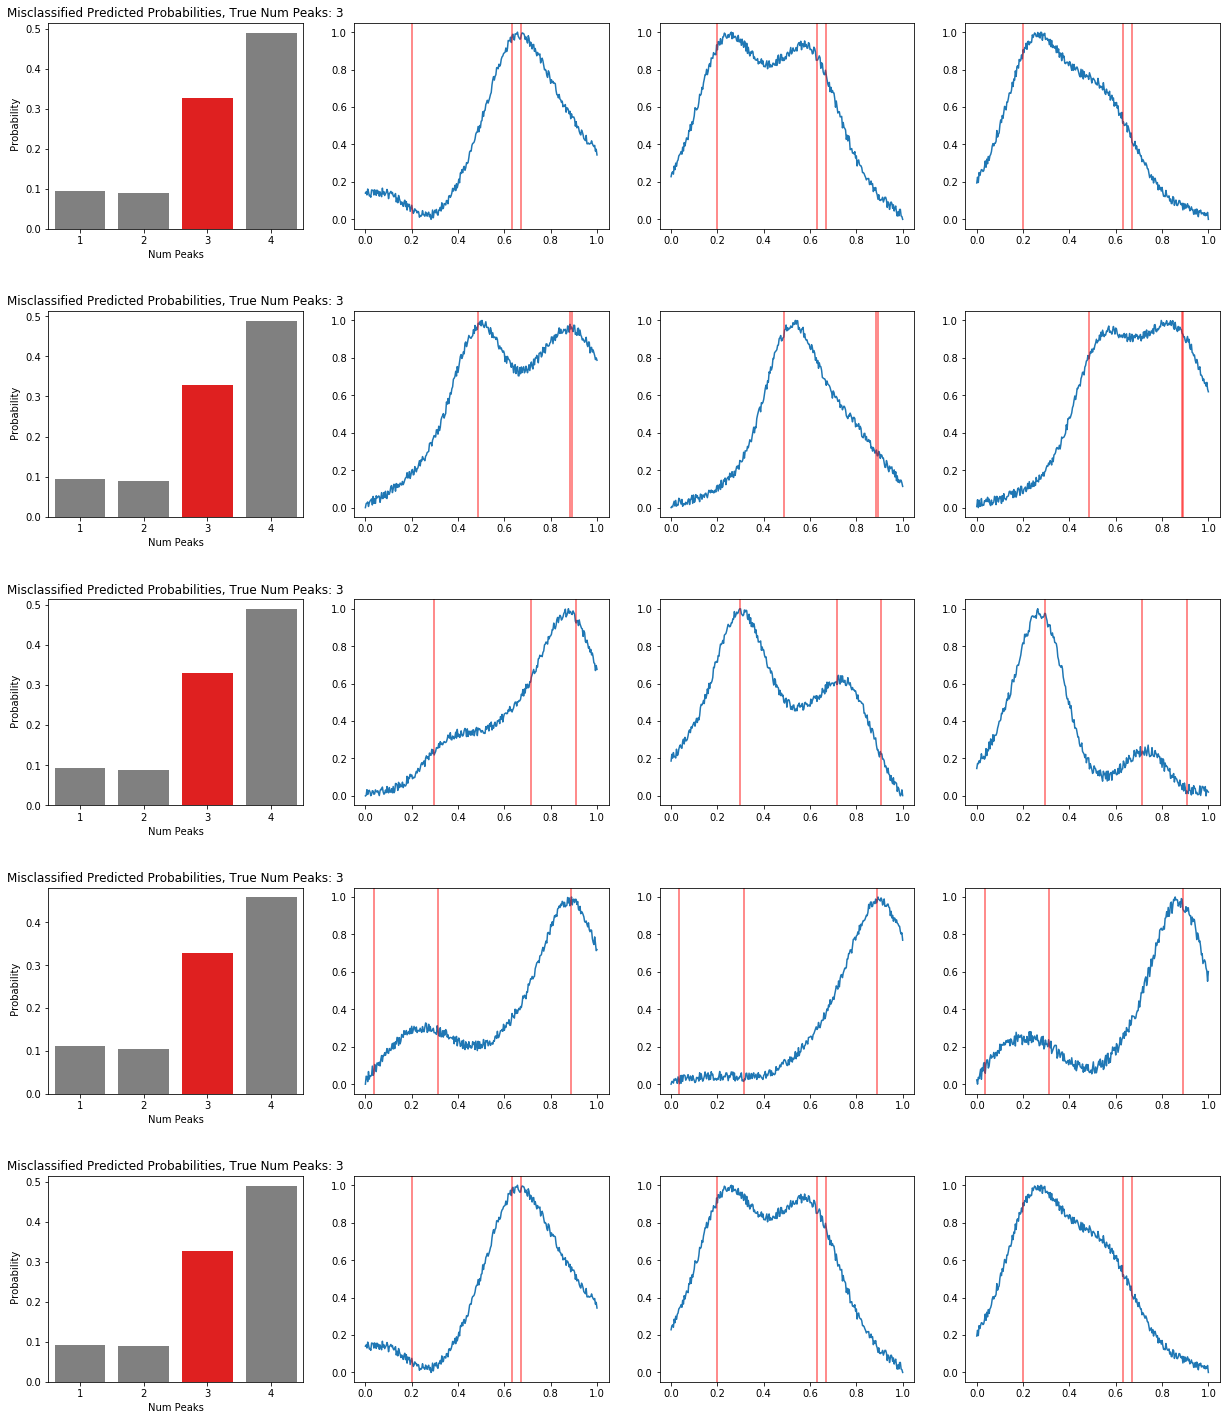

No misclassified 4 peaks.


In [44]:
complete_evaluation(evaluation_report, num_channels_to_show=3, num_examples_per_peak=5)

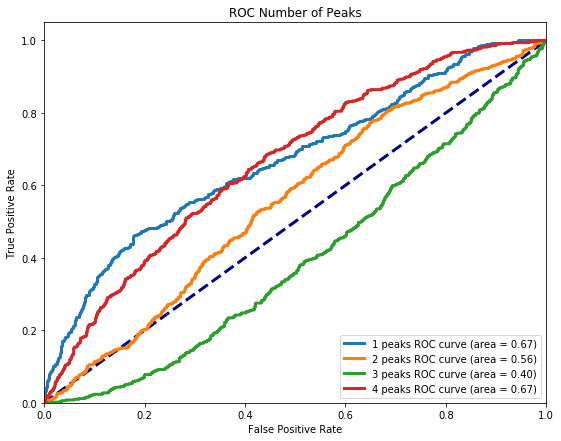

In [37]:
rc_curves = evaluation_report.plot_roc_curves()

In [28]:
evaluation_report.probs.mean(axis=0)

array([0.00338317, 0.26748902, 0.3447478 , 0.38438022], dtype=float32)

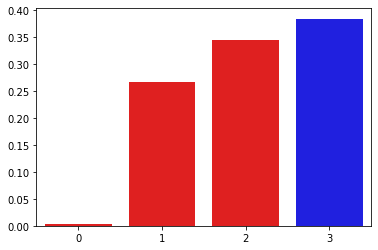

In [73]:
sns.barplot(x = [i for i in range(len(evaluation_report.labels))], y = evaluation_report.probs.mean(axis=0), palette=['red', 'red', 'red', 'blue'])

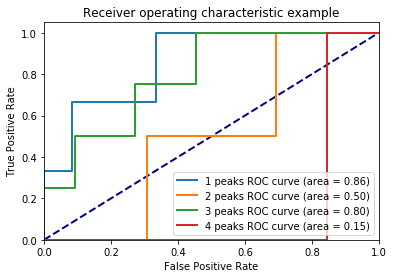

In [102]:
probs = g.keras_model.predict_proba(X_test)
num_peaks = 4
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Number of Peaks')

for i in range(num_peaks):
    probs_i = probs[:, i]
    y_true_i = y_test[:, i]
    fpr, tpr, _ = roc_curve(y_true_i, probs_i)
    roc_auc = roc_auc_score(y_true_i, probs_i)
    plt.plot(fpr, tpr,
         lw=lw, label='%d peaks ROC curve (area = %0.2f)' % (i + 1, roc_auc))
    plt.legend(loc='lower right')

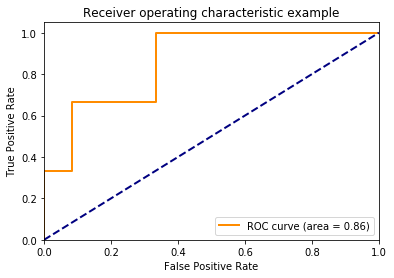

In [98]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [140]:
class GoogleModel(BaseModel):

    def set_params_range(self):
        return {'conv_1': {'type': 'integer', 'min': 8, 'max': 64, 'default': 16},
                'conv_2': {'type': 'integer', 'min': 8, 'max': 64, 'default': 32},
                'bi_1': {'type': 'float', 'min': 8, 'max': 128, 'default': 128},
                'bi_2': {'type': 'integer', 'min': 8, 'max': 128, 'default': 128},
                'drop_1': {'type': 'float', 'min': 0, 'max': 1, 'default': 0.01},
                'dense_1': {'type': 'float', 'min': 8, 'max': 128, 'default': 64},
                'drop_2': {'type': 'float', 'min': 0, 'max': 1, 'default': 0.05}
                }

    def build_model(self, num_channels, num_timesteps, output_shape, params):
        """
        From: https://github.com/douglas125/SpeechCmdRecognition/blob/master/SpeechModels.py

        """
        num_attention = num_timesteps - 8
        
        
        inp = Input(shape=(None,num_timesteps,None))
        model = Sequential()
        model.add(Conv1D(params['conv_1'], 5, input_shape=(num_timesteps, num_channels)))
        model.add(BatchNormalization())
        model.add(Conv1D(params['conv_2'], 5))
        model.add(BatchNormalization())
        model.add(Bidirectional(LSTM(params['bi_1'], return_sequences=True)))
        model.add(Bidirectional(LSTM(params['bi_2'], return_sequences=True)))
        model.add(Attention(num_attention))
        model.add(Dropout(params['drop_1']))
        model.add(Dense(params['dense_1'], activation='elu'))
        model.add(Dropout(params['drop_2']))
        model.add(Dense(output_shape, activation='softmax'))
        return model

In [141]:
g = GoogleModel(num_channels=50, num_timesteps=1001, output_shape=5)
baseline_model_compile_dict = {'optimizer': 'adam', 'loss': 'categorical_crossentropy', 'metrics':['accuracy']}
spectra_pp = SpectraPreprocessor(dataset_name='test', num_channels=5, num_instances=20, use_generator=False)
X_train, y_train, X_test, y_test = spectra_pp.transform(encoded=True)

In [143]:
#g.fit(X_train, y_train, X_test, y_test, 64, 1, compile_dict=baseline_model_compile_dict)

In [65]:
preds = g.keras_model.predict(X_test)

In [11]:
import pandas as pd

In [12]:
num_peaks = pd.DataFrame()
num_peaks['prob'] = preds[0]
num_peaks['n_peaks'] = list(range(1, 6))

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def plot_predicted_prob(peak_probs, ax):
    num_peaks = list(range(1, len(peak_probs) + 1))
    ax.bar(num_peaks, peak_probs)
    ax.set_title('Predicted Probability for Num Peaks')
    ax.set_xlabel('Num Peaks')
    ax.set_ylabel('Probability')

In [29]:
def plot_predicted_probs(peaks_probs, num_plots=None):
    if num_plots is None:
        num_plots = peaks_probs.shape[0]
    fig, axes = plt.subplots(math.ceil(num_plots), 1, figsize=(7, 70))
    
    for i in range(num_plots):
        plot_predicted_prob(peaks_probs[i], axes[i])
        
    plt.subplots_adjust(hspace = 0.9)
    plt.show()

In [30]:
from sklearn.metrics import precision_recall_curve

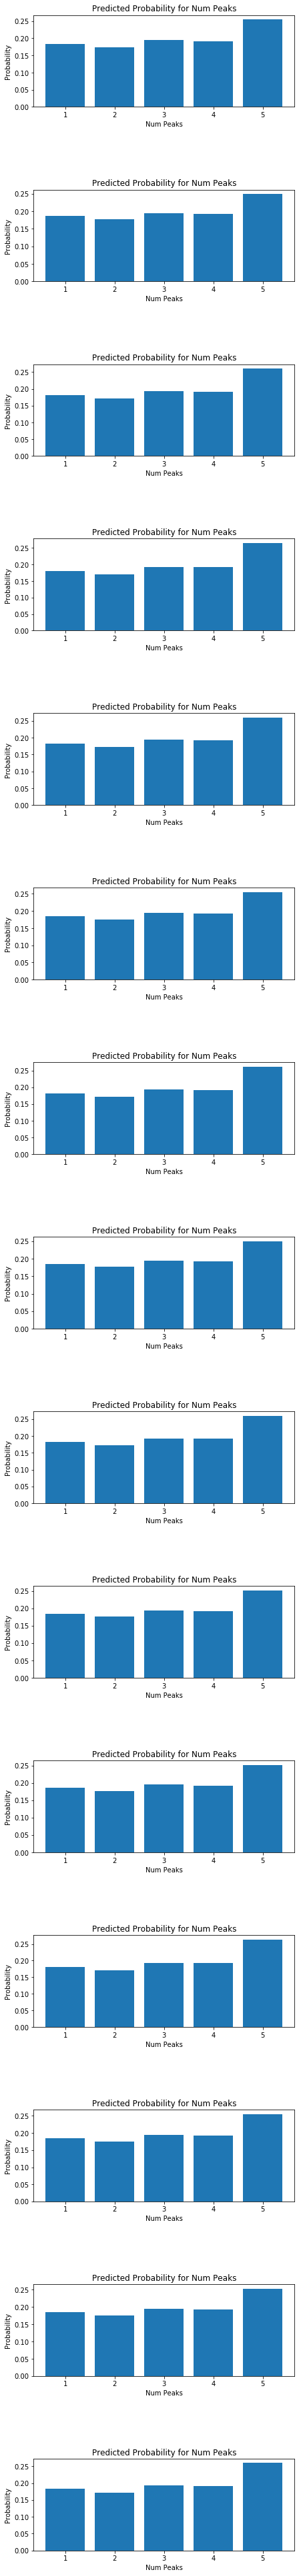

In [31]:
plot_predicted_probs(preds)

In [10]:
class GoogleModel(BaseModel):

    def set_params_range(self):
        return {'conv_1': {'type': 'integer', 'min': 8, 'max': 64, 'default': 16},
                'conv_2': {'type': 'integer', 'min': 8, 'max': 64, 'default': 32},
                'bi_1': {'type': 'float', 'min': 8, 'max': 128, 'default': 128},
                'bi_2': {'type': 'integer', 'min': 8, 'max': 128, 'default': 128},
                'drop_1': {'type': 'float', 'min': 0, 'max': 1, 'default': 0.01},
                'dense_1': {'type': 'float', 'min': 8, 'max': 128, 'default': 64},
                'drop_2': {'type': 'float', 'min': 0, 'max': 1, 'default': 0.05}
                }

    def build_model(self, num_channels, num_timesteps, output_shape, params):
        """
        From: https://github.com/douglas125/SpeechCmdRecognition/blob/master/SpeechModels.py

        """
        model = Sequential()
        model.add(Conv1D(params['conv_1'], 5))
        model.add(BatchNormalization())
        model.add(Conv1D(params['conv_2'], 5))
        model.add(BatchNormalization())
        model.add(Bidirectional(LSTM(params['bi_1'], return_sequences=True)))
        model.add(Bidirectional(LSTM(params['bi_2'], return_sequences=True)))
        model.add(Attention(993))
        model.add(Dropout(params['drop_1']))
        model.add(Dense(params['dense_1'], activation='elu'))
        model.add(Dropout(params['drop_2']))
        model.add(Dense(output_shape, activation='softmax'))
        return model

In [11]:
g = GoogleModel(num_channels=10, num_timesteps=1001, output_shape=4)